In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use("/home/daniel/papers/thesis/thesis-style.mpl")

In [2]:
import json

In [3]:
with open("catalog.json", 'r') as f:
    data = json.load(f)

In [4]:
import pandas as pd

In [5]:
import thesis

In [6]:
columns = ["initial_mass_ratio", "initial_dimensionless_spin1_x", "initial_dimensionless_spin1_y", "initial_dimensionless_spin1_z",
           "initial_dimensionless_spin2_x", "initial_dimensionless_spin2_y", "initial_dimensionless_spin2_z"]

In [7]:
data = pd.DataFrame(data)

In [8]:
plot_data = data[columns]
plot_data.columns = [u'mass ratio', u'$s_{1x}$',u'$s_{1y}$', u'$s_{1z}$',
       u'$s_{2x}$', u'$s_{2y}$',
       u'$s_{2z}$']

In [43]:
from matplotlib import rcParams

In [113]:
thesis.colors

{'blue': '#348ABD',
 'gray': '#777777',
 'purple': '#988ED5',
 'red': '#E24A33',
 'yellow': '#FBC15E'}

In [74]:
import numpy as np

In [124]:
import matplotlib.gridspec as gridspec
def coverage_plot(data, figsize=(9, 9), additional=[], color=thesis.colors['red']):
        """
        Plot an n-dimensional corner plot to illustrate the
        parameter space coverage of this catalogue.

        Parameters
        ----------
        figsize : tuple
           The size of the figure to be produced.
        additional : list
           A list of additional points to be added to the plot.

        Returns
        -------
        figure: `matplotlib.figure.Figure`#
           The figure object containing the corner plot.
        """

        lato = {'family': 'Lato',
                'color':  'black',
                'weight': 'light',
                'size': 10,
        }
        
        f = plt.figure(figsize=figsize, dpi=300)

        rcParams['lines.markersize'] = 1
        
        parameters = data.columns
        
        if not isinstance(additional, pd.DataFrame):
            # Convert additional to an array
            additional = pd.DataFrame(additional)

        # produce an n x n grid of subplots
        gs = gridspec.GridSpec(len(parameters), len(parameters),
                               wspace=0.0, hspace=0.0)


        # Make a legend for the additional points
        legend_ax = plt.subplot(gs[1,3])
        legend_ax.axis("off")
        legend_ax.grid(None)
        for i, point in enumerate(additional.iterrows()):
             legend_ax.scatter(0, i, marker="o", c=point[1]['color'], alpha=0.7)
             legend_ax.text(0.02, i, point[1]['label'], ha="left", va="center", fontdict=lato)
        legend_ax.set_xlim([-0.05, 0.3])
             
        for i, parameter in enumerate(parameters):
            for j, j_parameter in enumerate(parameters):

                if i > j:
                    # Don't produce a plot for combinations above the
                    # diagonal.
                    continue
                else:
                    # Produce a subplot for combinations on or below
                    # the diagonal
                    ax = plt.subplot(gs[j, i])
                    ax.grid(None)

                if i == j:
                    # This is the on-diagonal case, which we'll just skip for
                    # now. Ideally will want to insert a histogram here.
                    #print parameter, data[parameter]
                    if j > 0: bins = np.linspace(-1,1,20)
                    else: bins = np.linspace(0,10,20)
                    ax.hist(data[j_parameter], histtype="step", bins=bins, log=True, ec=color)
                    
                        
                   
                    ax.yaxis.tick_right()
                    ax.set_yticks([10,100,1000])
                    
                else:
                    
                    # Add in the 'additional' points
                    #ax.scatter(additional[parameter], additional[j_parameter], marker="o", c=additional['color'], alpha=0.7)


                    # Produce a scatter plot of the waveforms for this
                    # combination
                    ax.scatter(data[parameter],
                               data[j_parameter],
                               marker=",", color=color)
                if j == len(parameters) - 1:
                    ax.set_xlabel("{}".format(parameter))
                    ax.set_xticks(ax.get_xticks()[1:-1])
                    
                    if i > 0:
                        ax.set_xticks([-0.5, 0, 0.5])
                        ax.set_xlim([-1, 1])
                    for label in ax.get_xticklabels():
                         label.set_rotation(90)
                    
                else:
                    ax.set_xticks([])

                if i == 0 and j > 0:
                    ax.set_ylabel("{}".format(j_parameter))
                    #ax.set_yticks(ax.get_yticks()[1:-1])
                    
                    
                    if j > 0:
                        ax.set_yticks([-0.5, 0, 0.5])
                        ax.set_ylim([-1, 1])
                elif not i == j:
                    ax.set_yticks([])

        f.tight_layout()
        thesis.thesisify(f, height=1.5)
        return f

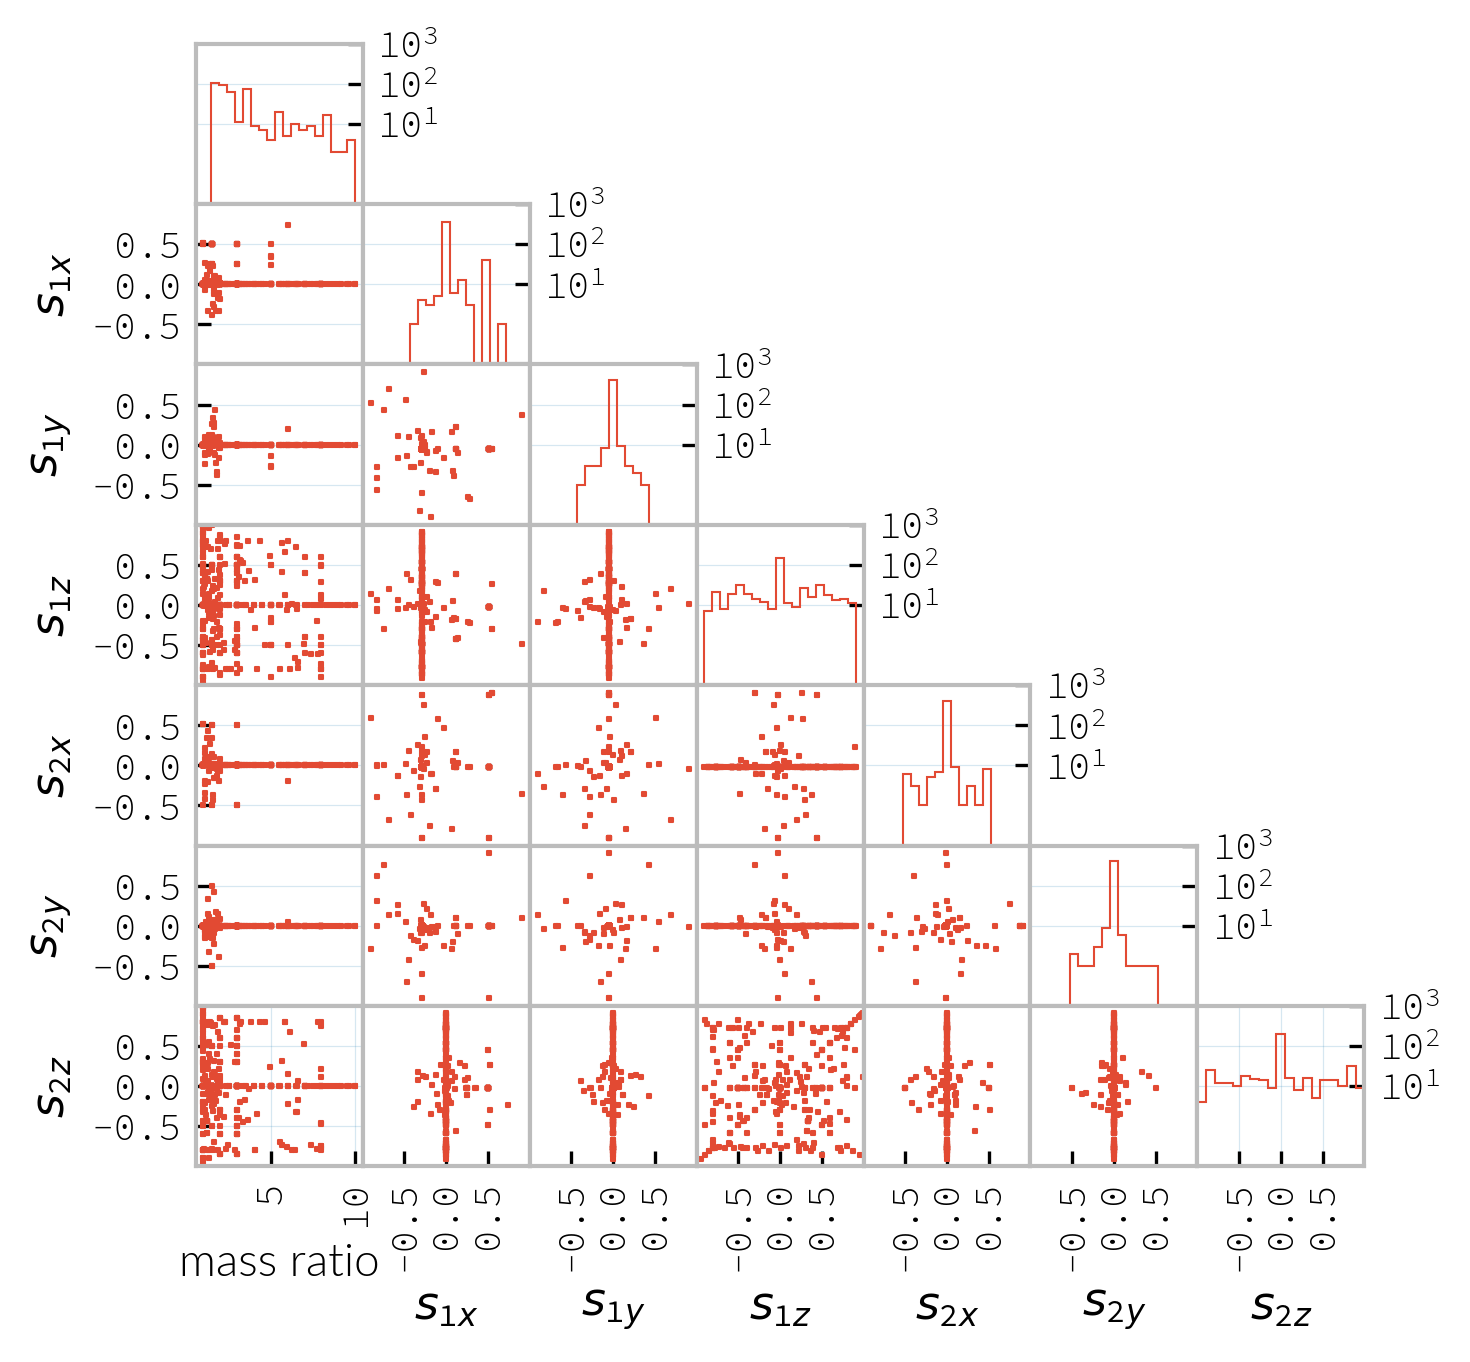

In [115]:
f = coverage_plot(plot_data)
f.savefig("../../figures/sources/sxs-catalogue.pdf")

In [116]:
import elk.catalogue

In [117]:
gt = elk.catalogue.NRCatalogue("GeorgiaTech")

In [118]:
gt_data = gt.table
del(gt_data['tag'])
del(gt_data['Mflower'])
gt_data['mass_ratio'] = 1./gt_data['mass_ratio']

In [119]:
gt_data.columns = plot_data.columns

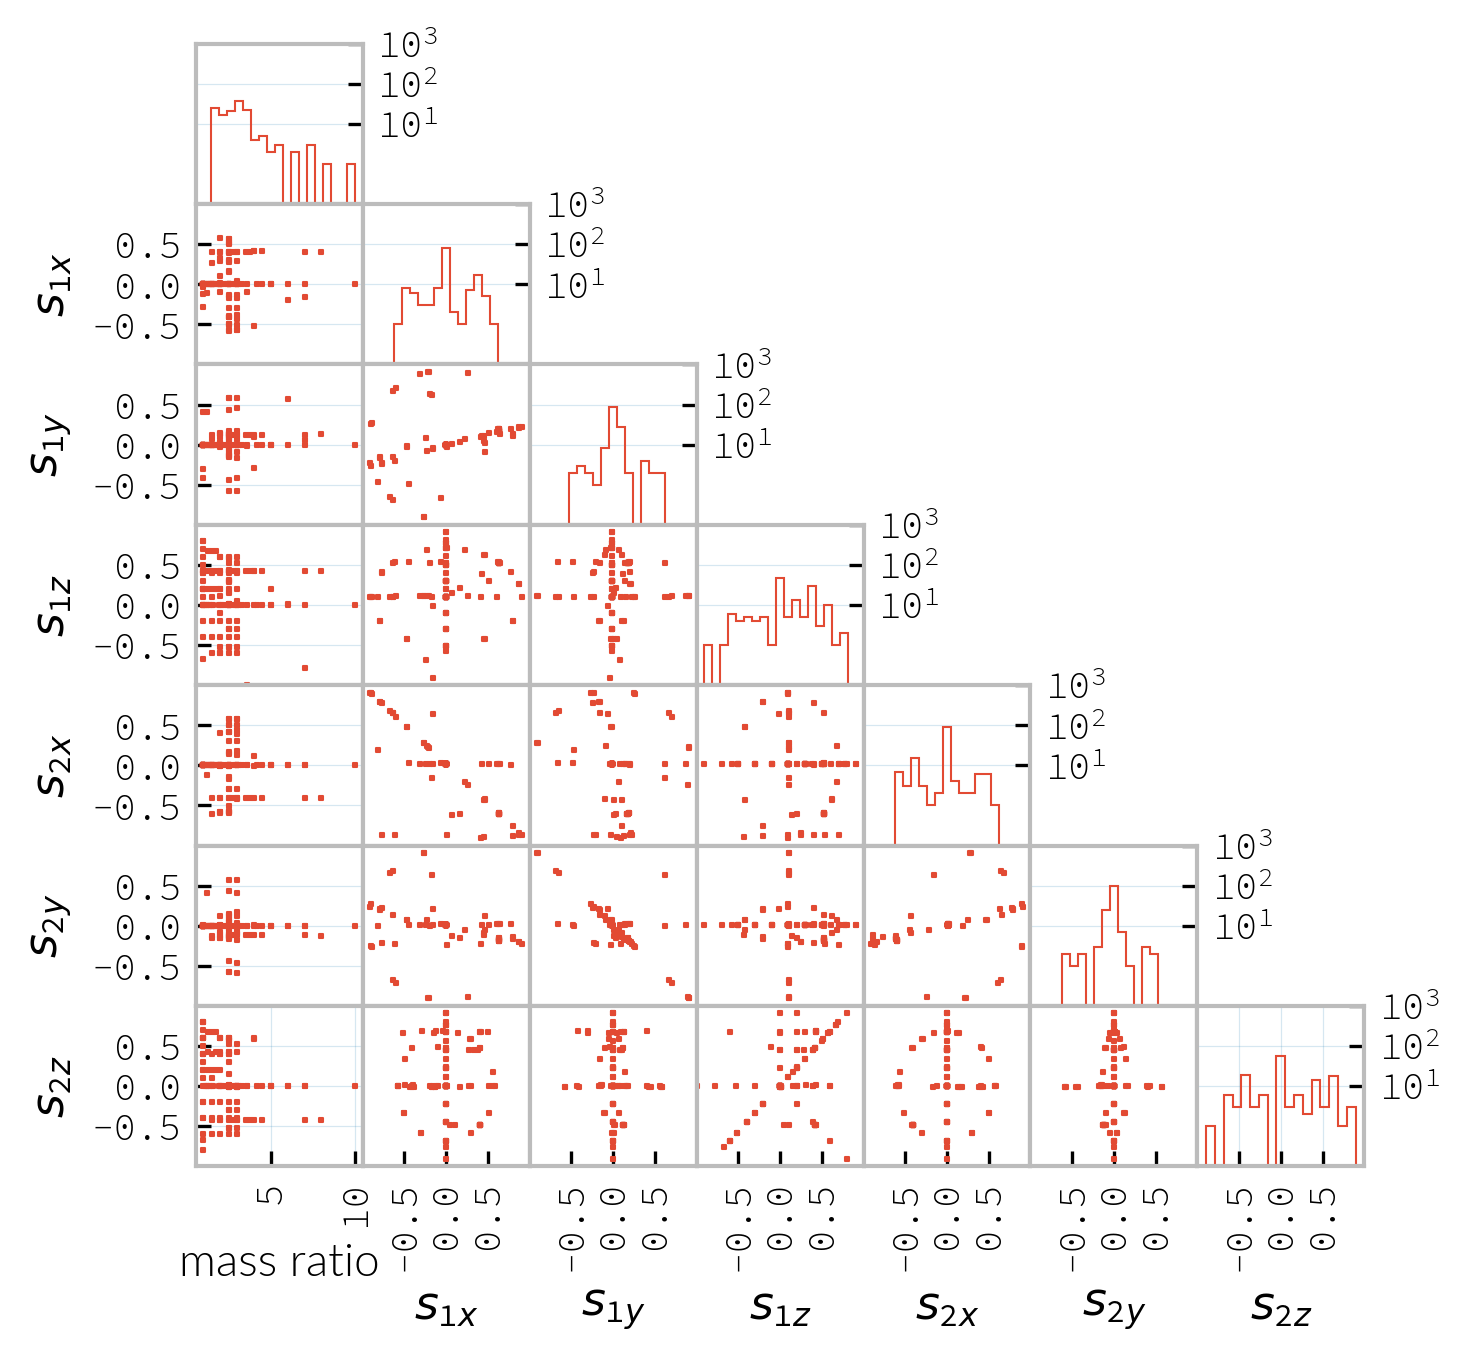

In [125]:
f = coverage_plot(gt_data)
f.savefig("../../figures/sources/gt-catalogue.pdf", color=thesis.colors['blue'])